**AMAZON SALES ANALYSIS**

**IMPORTING THE LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**LOADING THE DATA**

In [3]:
data = pd.read_csv('/content/Amazon Sales data.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
data['Item Type'].value_counts()

Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: Item Type, dtype: int64

In [5]:
data['Order Priority'].value_counts()

H    30
L    27
C    22
M    21
Name: Order Priority, dtype: int64

In [6]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [7]:
data.shape

(100, 14)

In [8]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

**SHIP DATE IS CONVERTED TO DATETIME FORMAT**

In [9]:
data['Ship Date']=pd.to_datetime(data['Ship Date'])
data['Order Date']=pd.to_datetime(data['Order Date'])

In [10]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [11]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [12]:
data.groupby('Sales Channel').count()['Item Type']

Sales Channel
Offline    50
Online     50
Name: Item Type, dtype: int64

<Axes: >

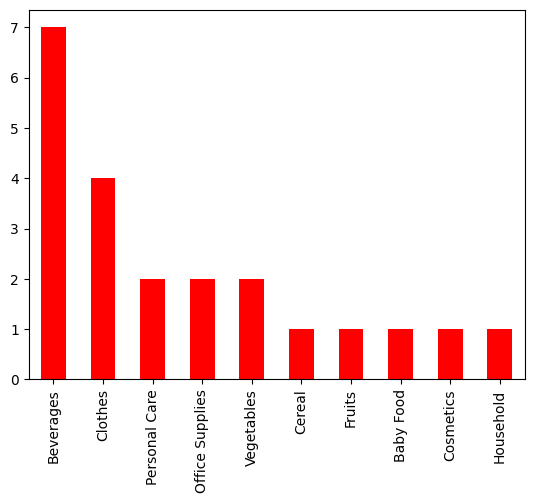

In [13]:
data[data['Order Priority']=='C']['Item Type'].value_counts().plot(kind='bar',color='r')

<Axes: >

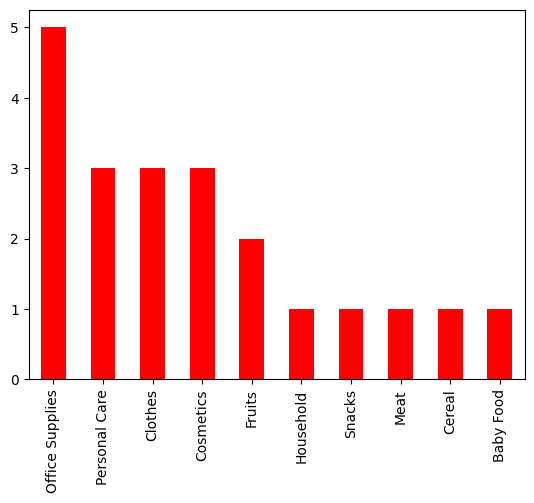

In [14]:
data[data['Order Priority']=='M']['Item Type'].value_counts().plot(kind='bar',color='r')

<Axes: >

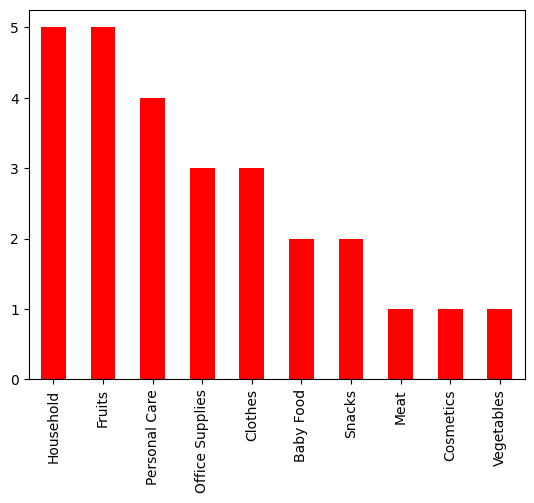

In [15]:
data[data['Order Priority']=='L']['Item Type'].value_counts().plot(kind='bar',color='r')

<Axes: >

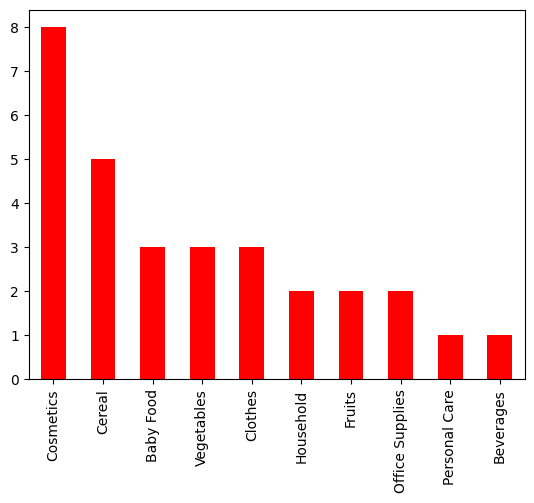

In [16]:
data[data['Order Priority']=='H']['Item Type'].value_counts().plot(kind='bar',color='r')

Critical Priority - Beverages, Clothes, personal care

High Priority - Cosmetics,Cereal,Baby food

Medium Priority - Office supplies,personal care,clothes

Low priority - House hold,personal care,fruits

In [17]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


<ipython-input-18-b511eee15eee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


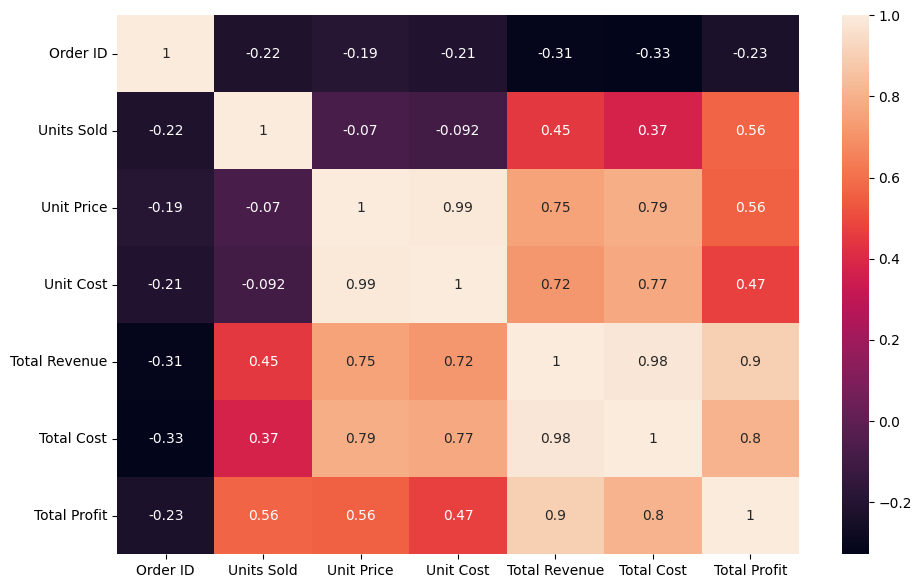

In [18]:
plt.figure(figsize=(11,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [19]:
data_sales = data.copy()

In [20]:
data_sales['Year']=data_sales['Ship Date'].dt.year

In [21]:
data_sales['Month']=data_sales['Ship Date'].dt.month

In [22]:
data_sales['Monnth Year']=data_sales['Ship Date'].dt.strftime('%m-%y')
data_sales['Unit Margin']=data_sales['Unit Price']-data_sales['Unit Cost']
data_sales['Total Sales']=data_sales['Units Sold']*data_sales['Unit Price']

In [23]:
data_sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Monnth Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25,3296425.02


In [24]:
Yearly_sales = data_sales.groupby('Year').sum()
Yearly_sales

<ipython-input-24-417992ff6680>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_sales = data_sales.groupby('Year').sum()


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Unit Margin,Total Sales
Year,,,,,,,,,,
2010,4303754612,57468,2118.06,1325.48,16604238.53,10616258.38,5987980.15,58,792.58,16604238.53
2011,6314058760,55414,2800.47,2011.06,11459719.49,8513570.23,2946149.26,79,789.41,11459719.49
2012,13533041667,101424,8417.71,6157.19,34149877.49,24500421.12,9649456.37,136,2260.52,34149877.49
2013,5977094656,62538,3736.56,2510.72,20156772.41,13494604.87,6662167.54,81,1225.84,20156772.41
2014,8380757847,94165,3025.30,2027.93,16803890.68,10871176.50,5932714.18,110,997.37,16803890.68
2015,6112829453,49480,2706.04,1833.40,12427982.86,8431443.42,3996539.44,73,872.64,12427982.86
2016,5978208036,43156,2713.61,1744.73,12372867.22,7469029.21,4903838.01,90,968.88,12372867.22
2017,4902296205,49226,2158.38,1494.29,13373419.63,9284066.18,4089353.45,28,664.09,13373419.63


**YEARLY TREND ANALYSIS**

In [25]:
Yearly_sales['Total Sales'].reset_index()

,Year,Total Sales
0,2010,16604238.53
1,2011,11459719.49
2,2012,34149877.49
3,2013,20156772.41
4,2014,16803890.68
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


<Figure size 2000x1500 with 0 Axes>

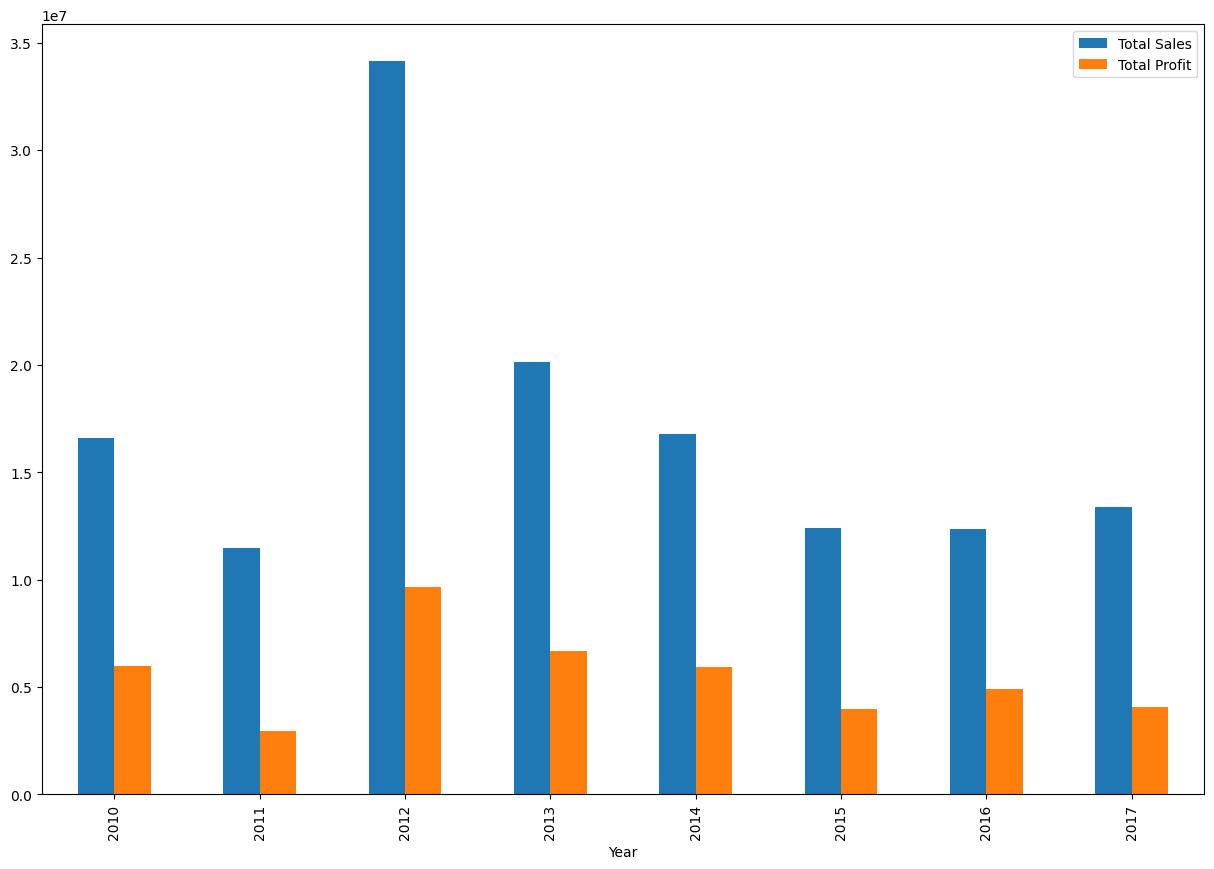

In [26]:
plt.figure(figsize=(20,15))
Yearly_sales[['Total Sales','Total Profit']].plot(kind='bar',figsize=(15,10))
plt.show()

In [27]:
Yearly_sales_data = data_sales.groupby(['Item Type','Year']).sum()
Yearly_sales_data=Yearly_sales_data.sort_values('Total Sales',ascending=False)


<ipython-input-27-118bde4a779a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_sales_data = data_sales.groupby(['Item Type','Year']).sum()


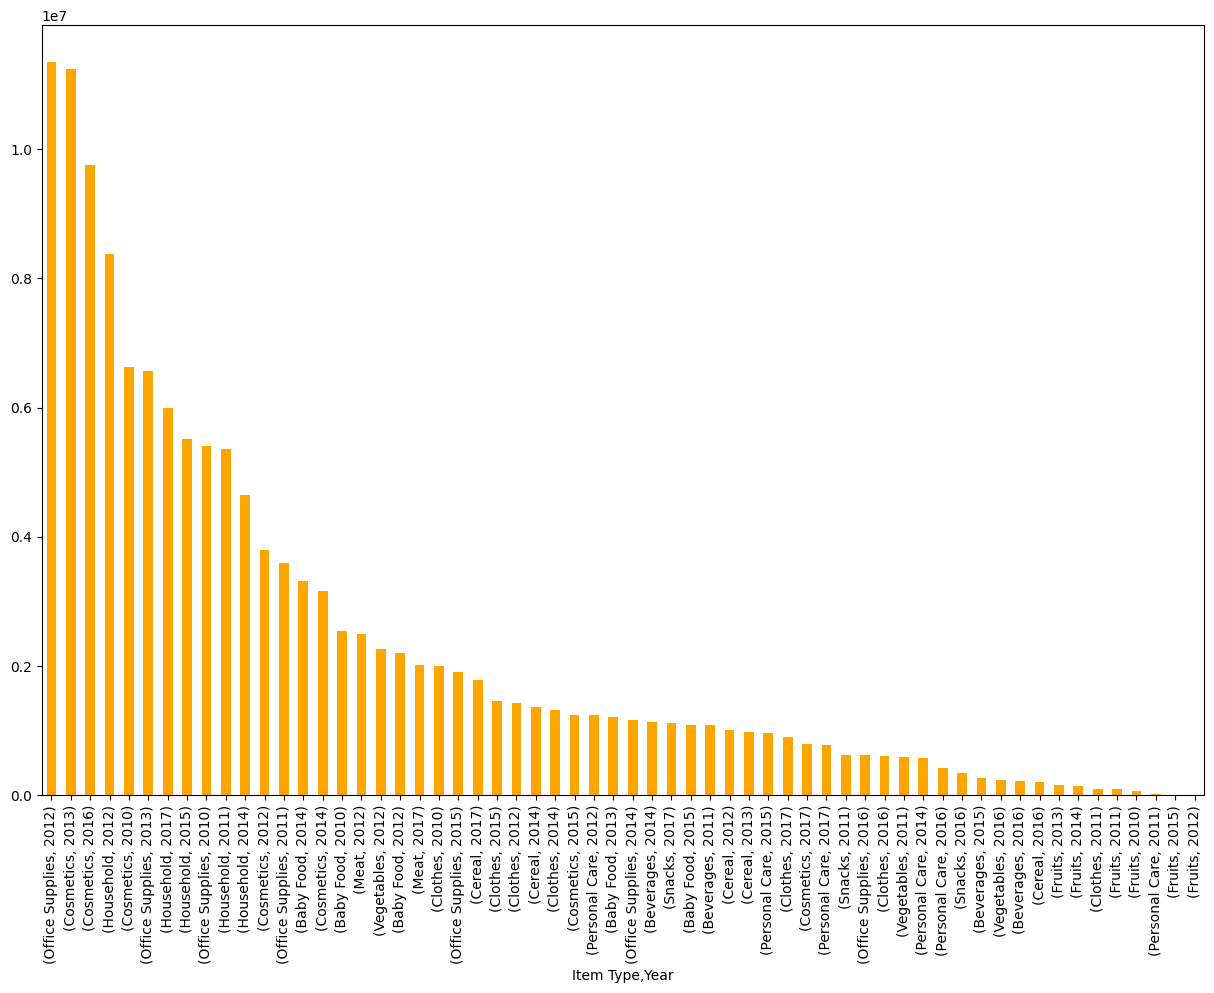

In [28]:
Yearly_sales_data['Total Sales'].plot(kind='bar',figsize=(15,10),color='orange')
plt.show()

<ipython-input-29-571bc12dec91>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_sales_data=data_sales.groupby('Item Type').sum()[['Total Profit','Total Sales']].plot(kind='bar',figsize=(12,8),title='Total sales by item type(Yearly)')


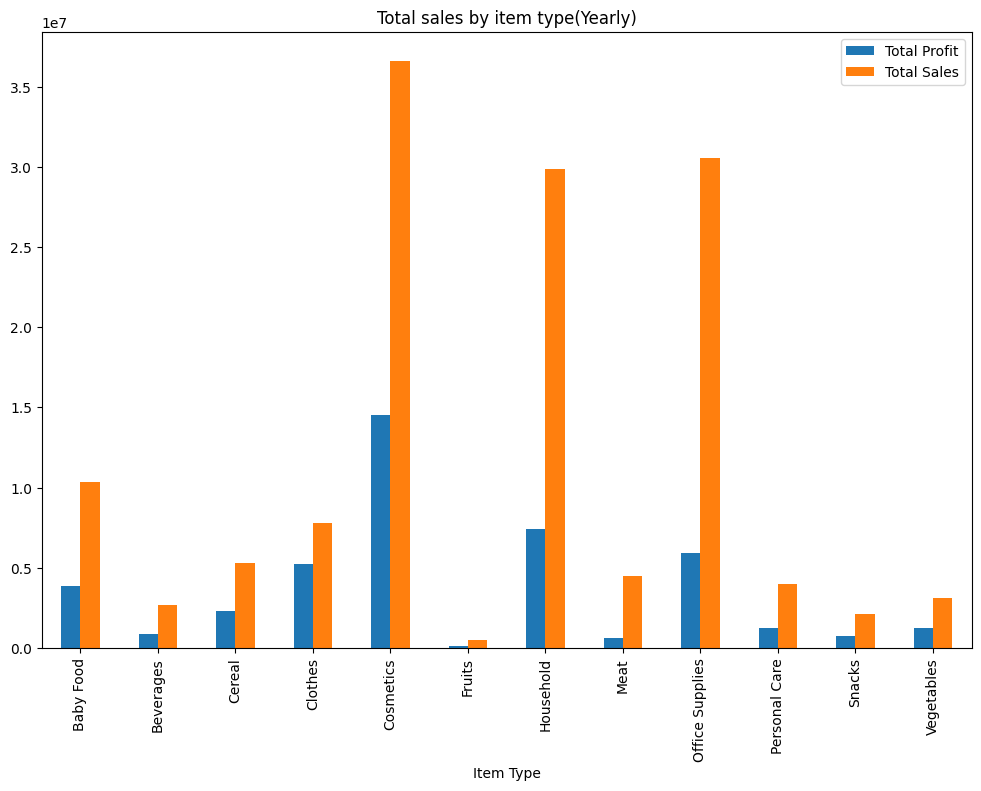

In [29]:
Yearly_sales_data=data_sales.groupby('Item Type').sum()[['Total Profit','Total Sales']].plot(kind='bar',figsize=(12,8),title='Total sales by item type(Yearly)')

**YEARLY INSIGHTS**

**YEARLY ITEMS SOLD**


**YEAR 2012:**
     
Most sales from office supplies(33% of total sales) items with household items(25% of total sales).

Most units sold are Office items.


Most profitable items are office supplies and household

**YEAR 2013:**

Most Sales from cosmestics(56% of total sales) items and office supplies(33% of total sales).

Most units sold are cosmestics and fruits.

Most profitable items are cosmestics and office supplies.

**YEAR 2011:**

Most sales from House hold(47% of total sales)items and office supplies(31% of total sales)

Most units sold are Beverages and fruits.

Most profitable items are Household.

    




**MONTHLY TREND ANALYSIS**

In [32]:
data_sales['Ship Date'].dt.strftime('%b')
Monthly_Sales = data_sales.groupby('Month').sum()
Monthly_Sales['Total Sales'].reset_index()

<ipython-input-32-670c4401c01f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Monthly_Sales = data_sales.groupby('Month').sum()


,Month,Total Sales
0,1,8884502.45
1,2,21105331.41
2,3,11322021.69
3,4,7402746.81
4,5,11945263.42
5,6,12019913.42
6,7,6016768.51
7,8,11050846.65
8,9,4188045.51
9,10,5314762.56


<Axes: title={'center': 'Monthly Sales'}, ylabel='Total Sales'>

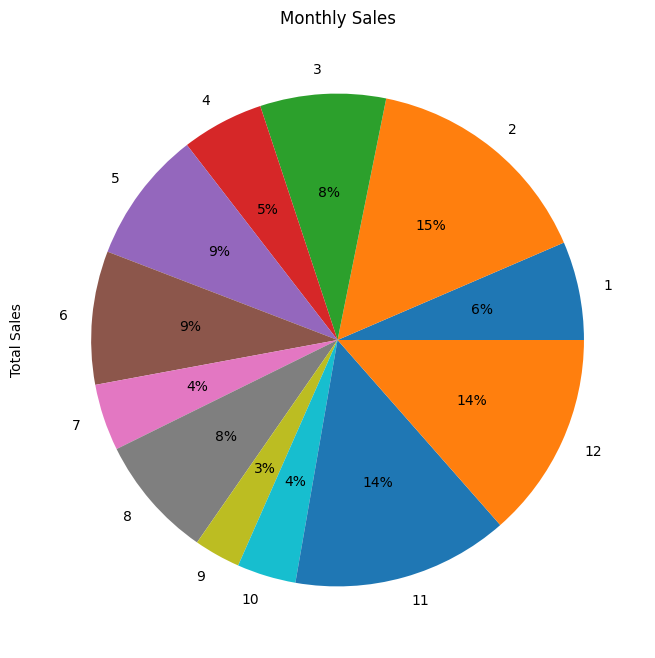

In [35]:
Monthly_Sales['Total Sales'].plot(kind='pie',autopct='%1.0f%%',figsize=(8,8),fontsize=10,title='Monthly Sales')

In [38]:
Monthly_Sales_Data = data_sales.groupby(['Item Type','Month']).sum()
Monthly_Sales_Data = Monthly_Sales_Data.sort_values('Total Sales',ascending=False)
Monthly_Sales_Data['Total Sales'].head()

<ipython-input-38-276f037ebdf2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Monthly_Sales_Data = data_sales.groupby(['Item Type','Month']).sum()


Item Type        Month
Cosmetics        12       13211309.60
Office Supplies  11       10894092.09
Household        2         9772112.21
Office Supplies  5         8789381.37
Cosmetics        8         8545511.20
Name: Total Sales, dtype: float64

**FREQUENCY OF ITEMS IN TOP 3 SALES MONTH **

<Axes: title={'center': 'Most ferquently ordered item in February'}>

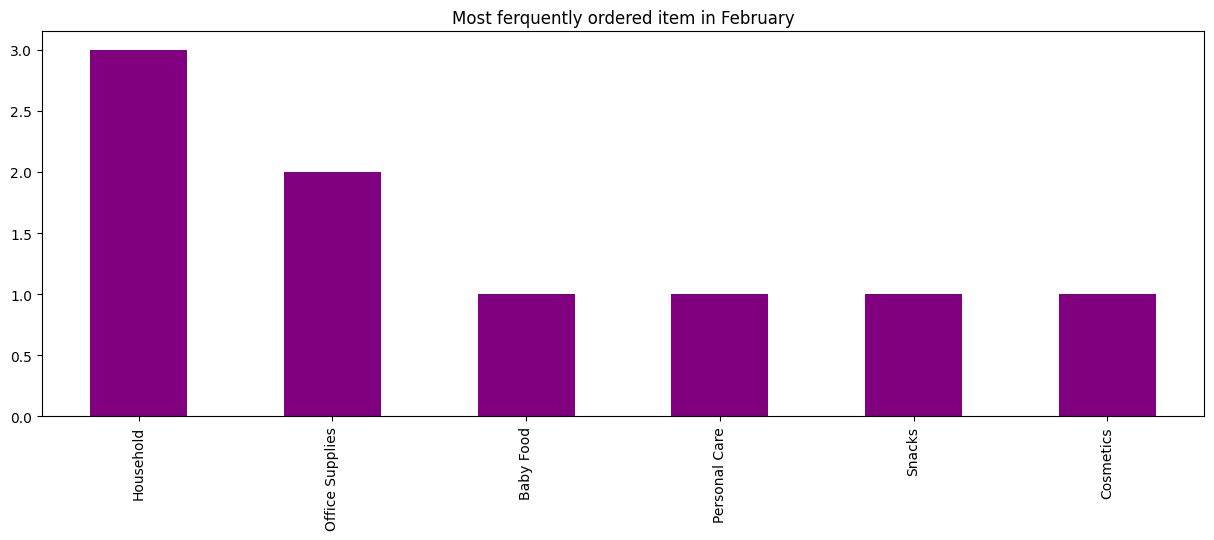

In [52]:
data_sales[data_sales['Month']==2]['Item Type'].value_counts().plot(kind='bar',color='purple',figsize=(15,5),title='Most ferquently ordered item in February')

<Axes: title={'center': 'Most ferquently ordered item in November'}>

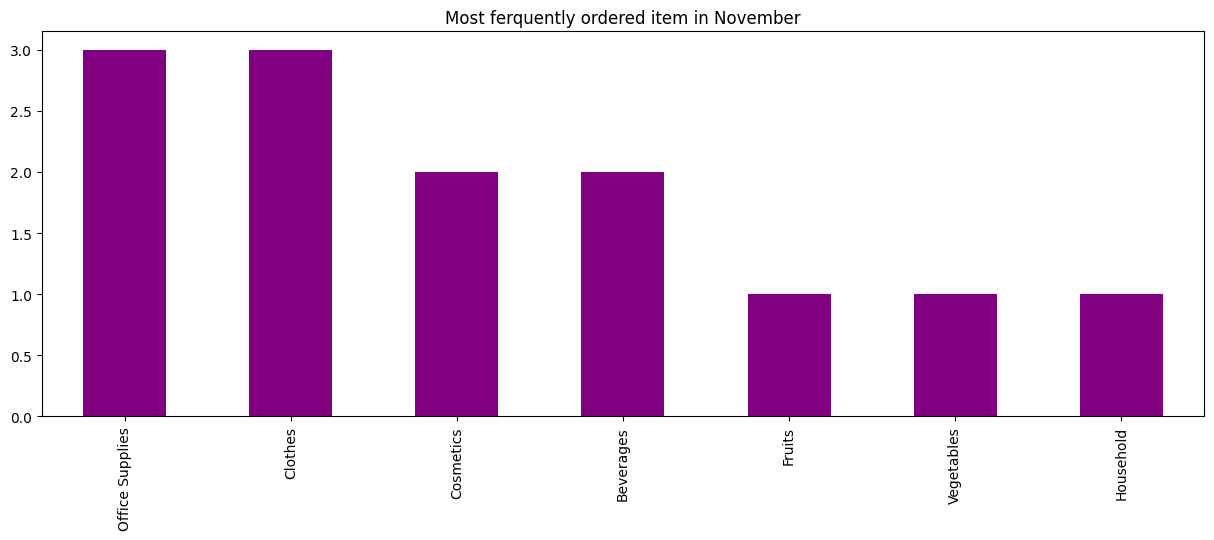

In [53]:
data_sales[data_sales['Month']==11]['Item Type'].value_counts().plot(kind='bar',color='purple',figsize=(15,5),title='Most ferquently ordered item in November')

<Axes: title={'center': 'Most ferquently ordered item in December'}>

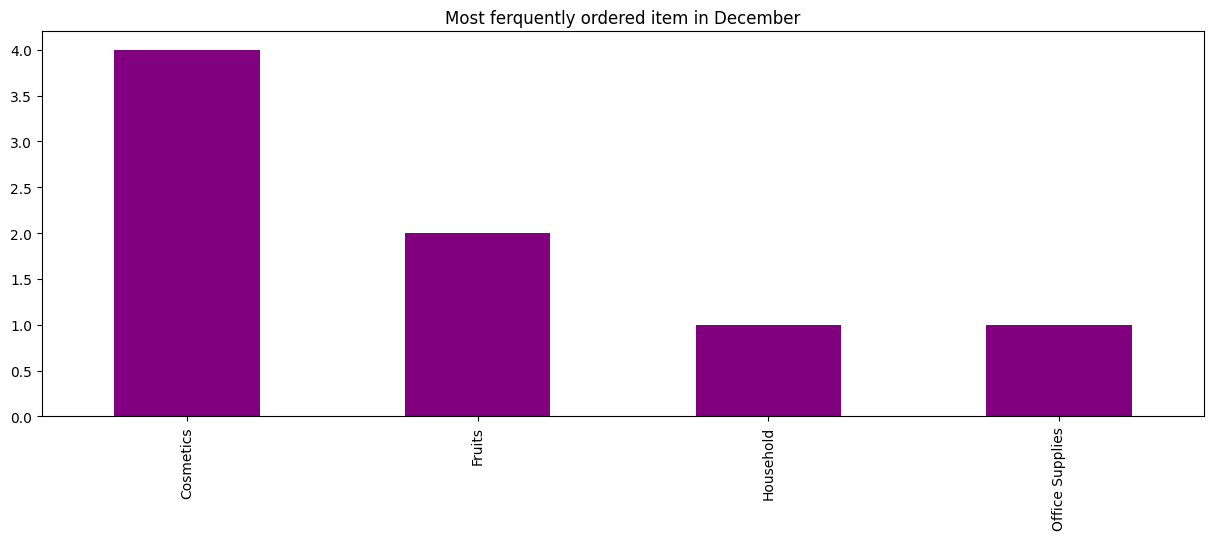

In [54]:
data_sales[data_sales['Month']==12]['Item Type'].value_counts().plot(kind='bar',color='purple',figsize=(15,5),title='Most ferquently ordered item in December')

<Axes: title={'center': 'ITEMS SOLD IN FEBRUARY'}, ylabel='Units Sold'>

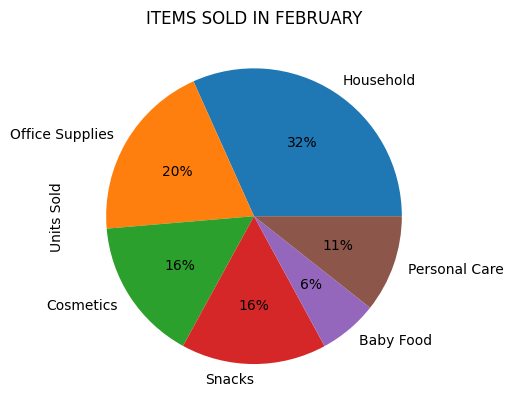

In [65]:
Monthly_Sales_Data.reset_index()[Monthly_Sales_Data.reset_index()['Month']==2].set_index('Item Type').plot(kind='pie',y='Units Sold',legend=False,autopct='%1.0f%%',title='ITEMS SOLD IN FEBRUARY')

<Axes: title={'center': 'ITEMS SOLD IN NOVEMBER'}, ylabel='Units Sold'>

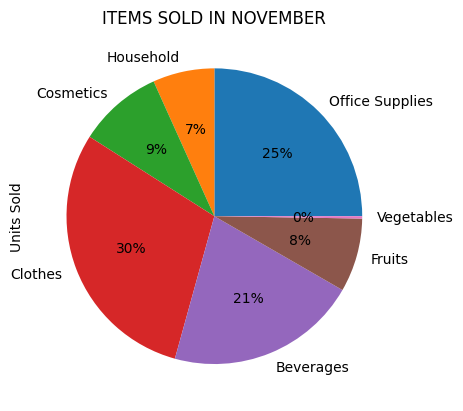

In [64]:
Monthly_Sales_Data.reset_index()[Monthly_Sales_Data.reset_index()['Month']==11].set_index('Item Type').plot(kind='pie',y='Units Sold',legend=False,autopct='%1.0f%%',title='ITEMS SOLD IN NOVEMBER')

<Axes: title={'center': 'ITEMS SOLD IN DECEMBER'}, ylabel='Units Sold'>

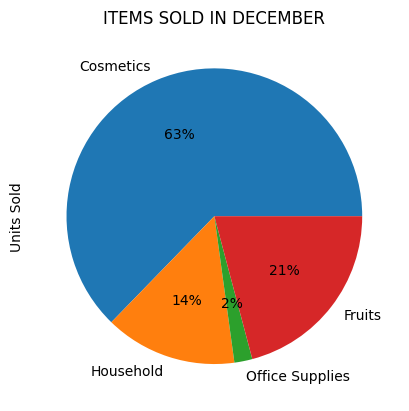

In [63]:
Monthly_Sales_Data.reset_index()[Monthly_Sales_Data.reset_index()['Month']==12].set_index('Item Type').plot(kind='pie',y='Units Sold',legend=False,autopct='%1.0f%%',title='ITEMS SOLD IN DECEMBER')



*   **February has Household products it is alomost 32% of total Items Sold in that Month**
*   **November has Office Supplies it is almost 30% pf Total Items Sold in that Month**
*   **December has Cosmestics it is almost 63% of Total Items Sold in that Month**





MONTH-YEARLY TREND ANALYSIS

<ipython-input-68-1683d0525981>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Data_sum = data_sales.groupby(['Year','Month']).sum()


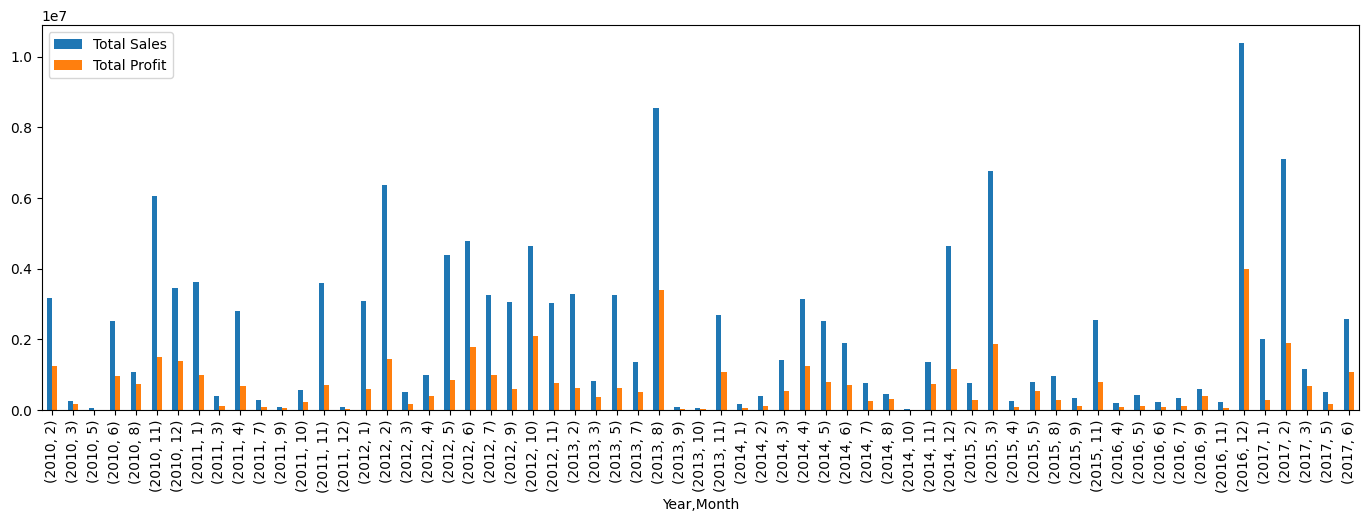

In [68]:
Data_sum = data_sales.groupby(['Year','Month']).sum()
Data_sum[['Total Sales','Total Profit']].plot(kind='bar',figsize=(17,5))
plt.show()

<Axes: xlabel='Year,Month'>

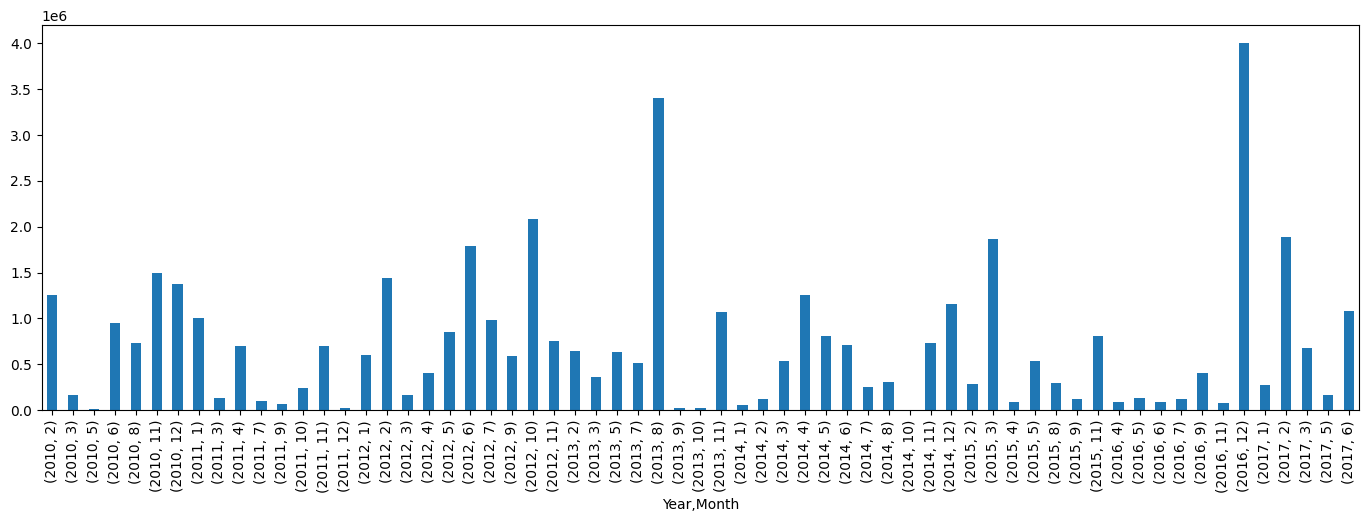

In [70]:
Data_sum['Total Profit'].plot(kind='bar',figsize=(17,5))

In [84]:
data_region = data_sales.groupby(['Region','Country','Item Type','Year','Month']).sum()
Data_sum=data_region.reset_index()

<ipython-input-84-a374476f747e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_region = data_sales.groupby(['Region','Country','Item Type','Year','Month']).sum()


array([<Axes: ylabel='Total Sales'>, <Axes: ylabel='Units Sold'>,
       <Axes: ylabel='Total Profit'>], dtype=object)

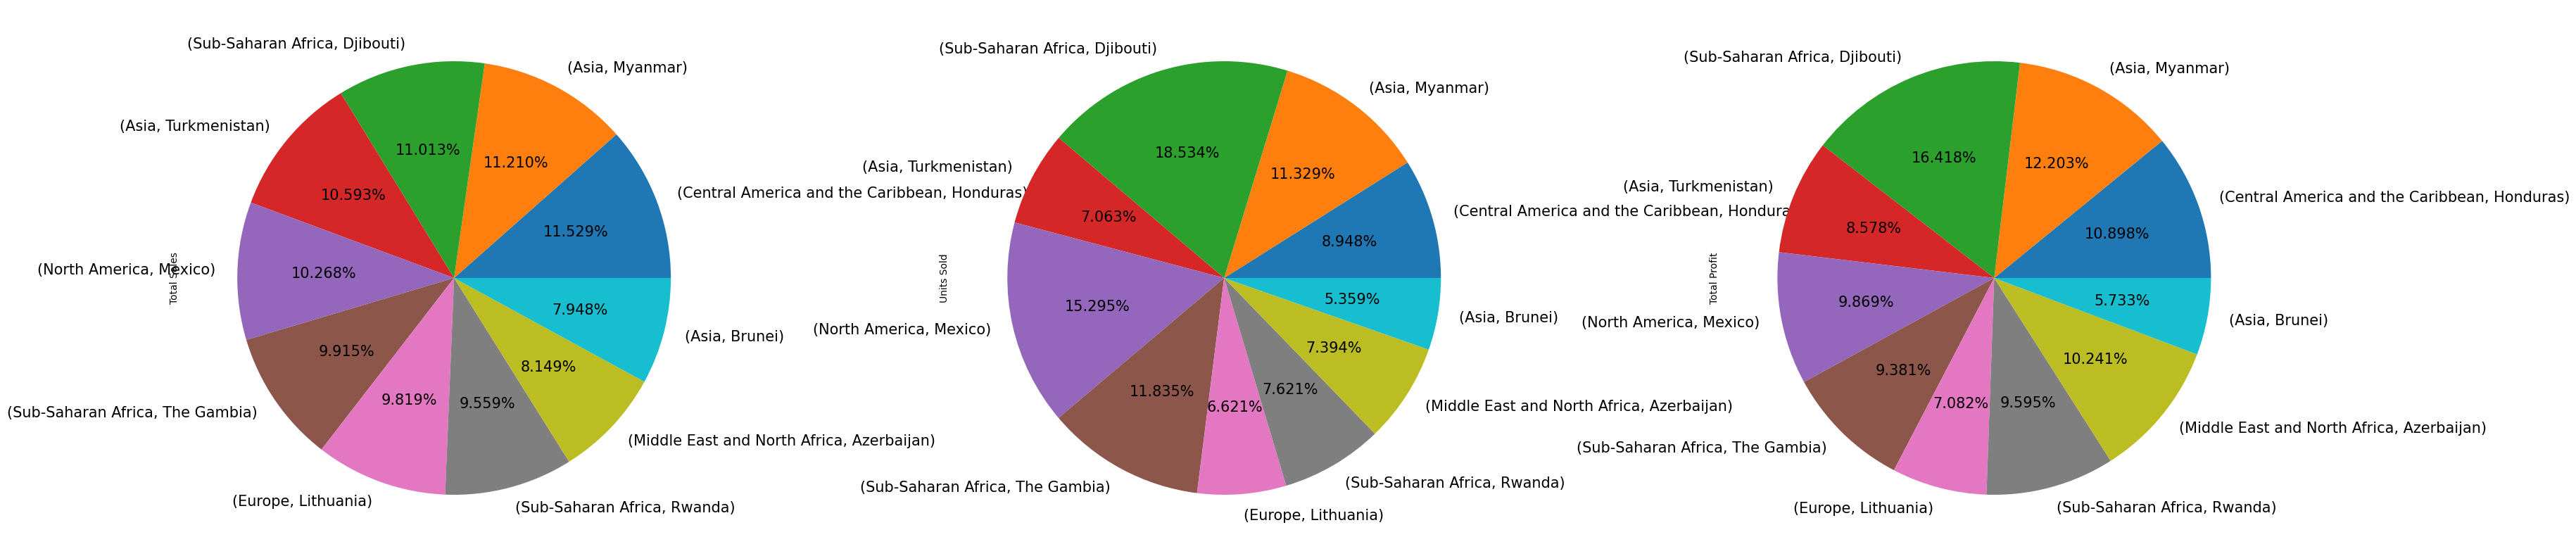

In [108]:
Data_sum.groupby(['Region','Country'])[['Total Sales','Units Sold','Total Profit']].sum().sort_values('Total Sales',ascending=False).head(10).plot(kind='pie',autopct='%0.3f%%',fontsize=15,subplots=True,legend=False,figsize=(40,10))

MONTHLY-YEARLY TREND INSIGHTS

Highest sales and profit in december 2016

Second highest is in sugust 2013.

Maximum Units sold is Cosmestics in december 2016.

Minimum units sold Vegetables in july 2011

Maximum profit is from Sub-Saharan Africa, Mali

Maximum Sales from Sub-Saharan, South Sudan